In [1]:
import optidex as dx
import numpy as np
import pandas as pd

In [2]:
def get_model_matrix(data, order, interactions_only=False, bias=True) -> pd.DataFrame:
    """
    :param pd.DataFrame data: Design matrix
    :param int order: Order of the polynomial (1-main effects, 2-quadratic effects, ...)
    :param bool interactions_only: Include terms as x1^2 or not
    :param bool bias: Include a beta_0 on the design matrix or not
    Generate the model matrix of a design matrix (argument)
    """
    from sklearn.preprocessing import PolynomialFeatures

    poly = PolynomialFeatures(order, interaction_only=interactions_only, include_bias=bias)
    df = pd.DataFrame(poly.fit_transform(data))
    df.columns = poly.get_feature_names(data.columns)
    return df

In [3]:
def poly_basis(start=-1, stop=1, order=3, bias=True):
    X = pd.DataFrame(np.linspace(start, stop, 50), columns=['x1'])
    XX = get_model_matrix(data=X, order=order, bias=bias)
    w = pd.DataFrame([3, 1 ,0.9, 1], index=XX.columns)
    return (XX @ w), XX

<AxesSubplot:>

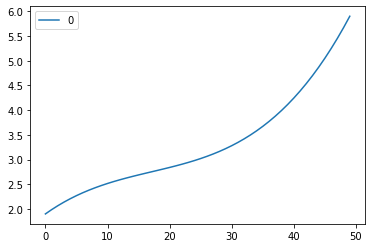

In [4]:
data, model_mat = poly_basis(start=-1, stop=1, order=3, bias=True)
data.plot()

In [5]:
model_mat

,1,x1,x1^2,x1^3
0,1.0,-1.000000,1.000000,-1.000000
1,1.0,-0.959184,0.920033,-0.882481
2,1.0,-0.918367,0.843399,-0.774550
3,1.0,-0.877551,0.770096,-0.675798
4,1.0,-0.836735,0.700125,-0.585819
5,1.0,-0.795918,0.633486,-0.504203
6,1.0,-0.755102,0.570179,-0.430543
7,1.0,-0.714286,0.510204,-0.364431
8,1.0,-0.673469,0.453561,-0.305459
9,1.0,-0.632653,0.400250,-0.253219


In [6]:
des_1 = dx.Design(experiments=10,
                  levels={
                      0: [-1, 0, 1],
                      1: [-5, 5],
                      2: [-1, 0, 1],
                      3: [-1, 0, 1]
                  })
des_1.set_model(order=2, interactions_only=False, bias=True)
des_1.set_algorithm(engine="det", epochs=100)
des_1.__dict__

AttributeError: 'Design' object has no attribute 'set_model'

In [ ]:
des_2 = dx.Functional(experiments=10,
                      levels={
                          0: [-1, 0, 1],
                          1: [-5, 5],
                          2: [-1, 0, 1],
                          3: [-1, 0, 1]
                      })
des_2.__dict__

In [ ]:
f_des = dx.Functional(experiments=10,
                      levels={
                          0: [-1, 0, 1],
                          1: [-5, 5],
                          2: [-1, 0, 1],
                          3: [-1, 0, 1]
                      })

In [ ]:
f_des.set_model(order=2)

In [ ]:
f_des.set_algorithm(epochs=100, engine='det')

In [ ]:
f_des.__dict__

In [ ]:
f_des.test()

In [ ]:
t = np.linspace(-1,1)
((t>0) & (t<0.5))*t

In [ ]:
def tanh(t, c):
    return (np.exp(t + c) - np.exp(c - t)) / (np.exp(t + c) + np.exp(c - t))

In [ ]:
W = np.array([3, -5, 6, -2])
c_t = np.array([1, tanh(t, -1), tanh(t, 0), tanh(t, 1)])


In [1]:
from basis import *

In [2]:
t = smp.symbols('t')
scaling = evaluate(vec1=sigmoid(x=t, centers=[-1,0,1]),
                   vec2=sigmoid(x=t, centers=[-1,0,1]),
                   symbol=t,
                   lower=0,
                   upper=1)
scaling

2.2018106669168622

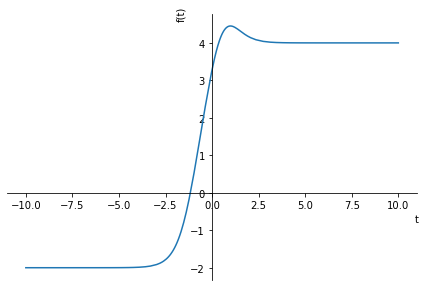

In [3]:
a = tanh(x=t, centers=[-1, 0, 1])
w = [1,-1,2,2]
smp.plot(w @ a.T)

In [4]:
a = step(x=t, centers=[0,1], h=-1)
a

TypeError: unsupported operand type(s) for &: 'int' and 'Symbol'

In [7]:
smp.Piecewise(1, ((t>-1) & (t<0)), 0)

TypeError: sympy.functions.elementary.piecewise.ExprCondPair() argument after * must be an iterable, not int

In [21]:
c_t = np.append(1, np.array([smp.Piecewise((1, ((t>-1) & (t<=-0.5))), (0, True)),
                             smp.Piecewise((1, ((t>-0.5) & (t<=0))), (0, True)),
                             smp.Piecewise((1, ((t>0) & (t<=0.5))), (0, True)),
                             smp.Piecewise((1, ((t>0.5) & (t<=1))), (0, True))]))
c_t

array([1, Piecewise((1, (t <= -0.5) & (t > -1)), (0, True)),
       Piecewise((1, (t <= 0) & (t > -0.5)), (0, True)),
       Piecewise((1, (t <= 0.5) & (t > 0)), (0, True)),
       Piecewise((1, (t <= 1) & (t > 0.5)), (0, True))], dtype=object)

In [38]:
def divide(number, parts):
    '''
    number is the last number of the range and parts is no. of intervals you
    want to make
    '''
    chunksize = number/parts              # size of each interval
    chunkstart = 1                        # start of interval
    chunkend = chunkstart + chunksize -1  # end of that interval
    while chunkstart < number:            # don't go beyond the range
        if chunkend > number:             # interval end is beyond the range
            print(chunkstart, number)
            break                         # we are beyond the range now
        print(chunkstart, chunkend)
        chunkstart += chunksize           # take me to beginning of next interval
        chunkend += chunksize             # also tell me where to end that

In [39]:
divide(102,5)

1 20.4
21.4 40.8
41.8 61.199999999999996
62.199999999999996 81.6
82.6 102.0


In [1]:
import sympy as smp
from basis import *
t = smp.symbols('t')

c_t = gaussian_k(x=t, centers=[0, 5, 10], h=1)
w_c_t = [0, 1, -1, 0.2]




smp.plot(w_c_t @ c_t.T)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 4)

In [24]:
c_t = relu(t, centers=[-1,1])
b_t = relu(t, centers=[-1,1])

# scaling = evaluate(c_t, b_t)

In [25]:
smp.Matrix(c_t @ b_t.T).integrate((t, 0, 1)).evalf()

Matrix([
[1.0, 0,              1.5],
[  0, 0,                0],
[1.5, 0, 2.33333333333333]])